In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import quantum_imaging as qi
import quantum_drawer as qd
from IPython.display import Image
import numpy as np
%matplotlib inline

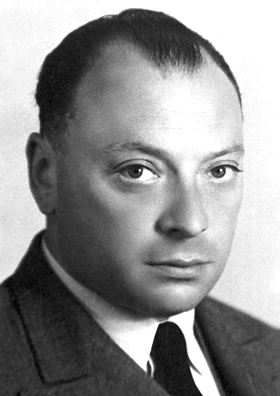

In [2]:
Image("pauli.jpg")

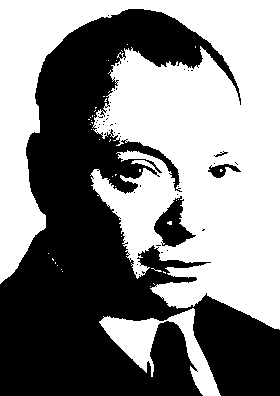

In [3]:
image_pauli = qi.convert_to_bw("pauli.jpg")
qi.image_from_array(image_pauli)

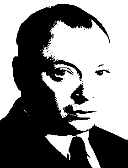

In [6]:
resized_image_pauli = qi.resize_array(image_pauli, size=(128, 168))
qi.image_from_array(resized_image_pauli)

In [7]:
array_binary_pauli = qi.binary_encode(resized_image_pauli)
qi.save_bin_array_to_csv('quantum_pauli.csv', array_binary_pauli)

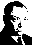

In [10]:
resized_image_pauli_tiny = qi.resize_array(image_pauli, size=(32, 45))
qi.image_from_array(resized_image_pauli_tiny)

In [11]:
array_binary_pauli_tiny = qi.binary_encode(resized_image_pauli_tiny)
qi.save_bin_array_to_csv('quantum_pauli_tiny.csv', array_binary_pauli_tiny)

# Use one-hot encoding drawing file to create a Quantum circuit and rebuild the image with the circuit result

# Only support square images (i.e: 32x32px, 64x64px)

In [13]:
# Simulator
qasm_sim = Aer.get_backend("aer_simulator")

# Number of circuit qubits
n_qubits = 7

In [14]:
binary_data_array = qi.load_bin_array_from_csv('quantum_pauli.csv')

cols_items = binary_data_array.shape[1]
splitting = splitting_chunks(cols_items, n_qubits)

rework_image = qd.rebuild_image_quantum_enhance_onerun(binary_data_arra, splitting, n_qubits, qasm_sim)
rework_image.shape

(168, 128)

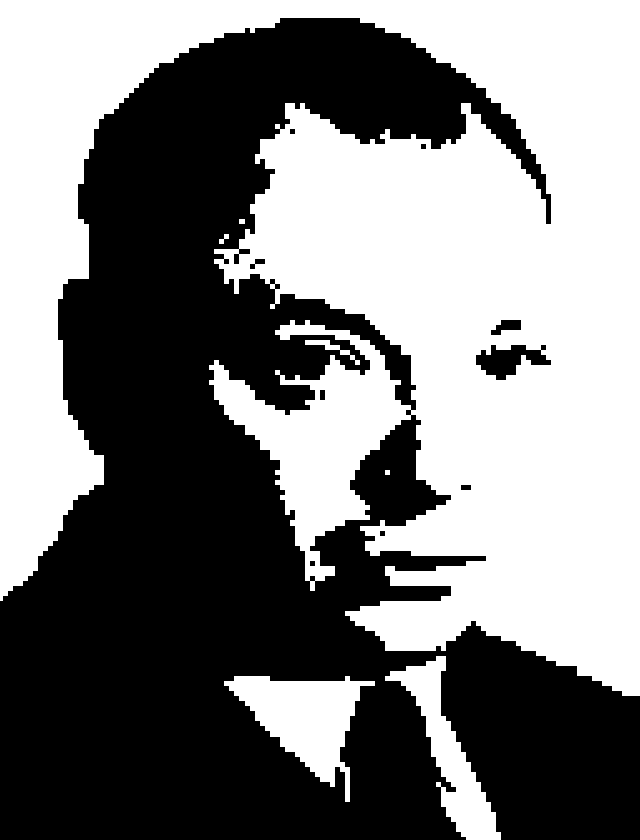

In [15]:
rebuild_data = qi.rebuild_binary_array(rework_image)
#qi.image_from_array(rebuild_data)
scaled_image = qi.scale_binary_image(rebuild_data, 5)
qi.image_from_array(scaled_image)

In [19]:
import qiskit.tools.jupyter
%qiskit_version_table